<a href="https://colab.research.google.com/github/faraztrazaky/RLD/blob/main/Heart_Attack_Prediction_GradientBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('heart_attack_prediction_indonesia.csv')

In [ ]:
df

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158350,60,Female,Rural,Middle,0,0,199,0,79,0,...,74,79,52,238,234,Normal,0,1,0,0
158351,64,Female,Urban,Low,0,0,179,0,93,0,...,73,111,41,177,239,Normal,0,1,1,1
158352,30,Male,Urban,Middle,0,0,220,0,78,0,...,87,127,50,158,201,Abnormal,1,1,1,1
158353,74,Male,Urban,Middle,0,0,180,0,58,1,...,70,119,52,153,171,Normal,1,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

In [ ]:
df.describe()

,age,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
count,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000
mean,54.543778,0.299069,0.199804,199.533264,0.249901,93.268504,0.300218,6.480064,129.515772,79.490809,110.736762,49.491478,129.569916,149.715885,0.200575,0.499770,0.601029,0.401004
std,11.910897,0.457851,0.399854,39.737565,0.432957,16.382205,0.458354,1.425398,15.005641,10.002964,27.673445,9.982634,34.913318,49.023473,0.400432,0.500002,0.489688,0.490103
min,25.000000,0.000000,0.000000,100.000000,0.000000,20.000000,0.000000,3.000000,61.000000,37.000000,70.000000,8.000000,-19.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,172.000000,0.000000,82.000000,0.000000,5.492985,119.000000,73.000000,89.000000,43.000000,106.000000,116.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,199.000000,0.000000,93.000000,0.000000,6.507461,130.000000,80.000000,109.000000,49.000000,130.000000,149.000000,0.000000,0.000000,1.000000,0.000000
75%,63.000000,1.000000,0.000000,226.000000,0.000000,104.000000,1.000000,7.520640,140.000000,86.000000,130.000000,56.000000,153.000000,183.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,350.000000,1.000000,173.000000,1.000000,9.000000,199.000000,127.000000,230.000000,93.000000,282.000000,380.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
age,0
gender,0
region,0
income_level,0
hypertension,0
diabetes,0
cholesterol_level,0
obesity,0
waist_circumference,0
family_history,0


In [ ]:
df = df.fillna(method='ffill')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
age,int64
gender,object
region,object
income_level,object
hypertension,int64
diabetes,int64
cholesterol_level,int64
obesity,int64
waist_circumference,int64
family_history,int64


In [ ]:
df.shape

(158355, 28)

In [ ]:
df.columns

Index(['age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes',
       'cholesterol_level', 'obesity', 'waist_circumference', 'family_history',
       'smoking_status', 'alcohol_consumption', 'physical_activity',
       'dietary_habits', 'air_pollution_exposure', 'stress_level',
       'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic',
       'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
       'triglycerides', 'EKG_results', 'previous_heart_disease',
       'medication_usage', 'participated_in_free_screening', 'heart_attack'],
      dtype='object')

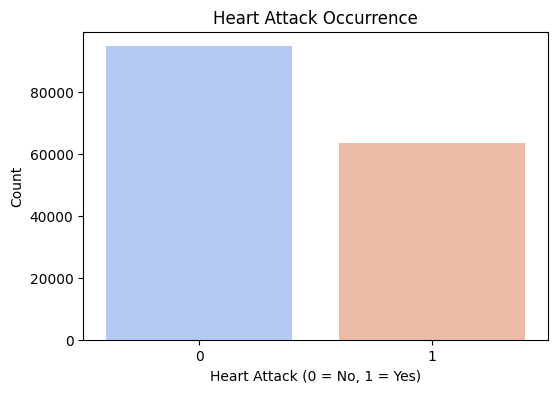

In [ ]:
# Distribution of target variable (heart attack cases)
plt.figure(figsize=(6,4))
sns.countplot(x='heart_attack', data=df, palette='coolwarm')
plt.title("Heart Attack Occurrence")
plt.xlabel("Heart Attack (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

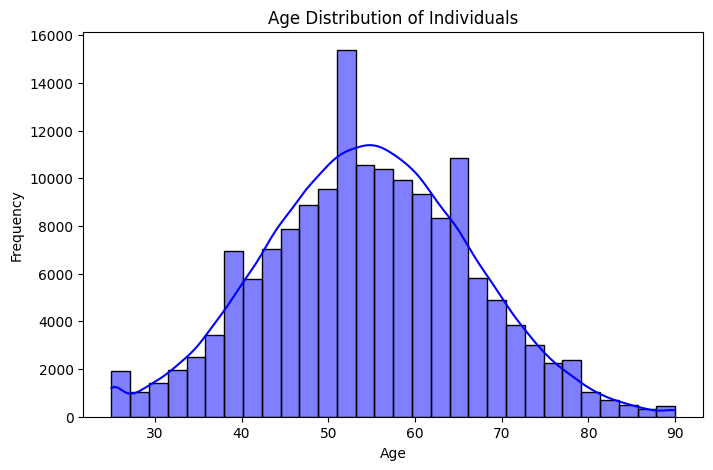

In [ ]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution of Individuals")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

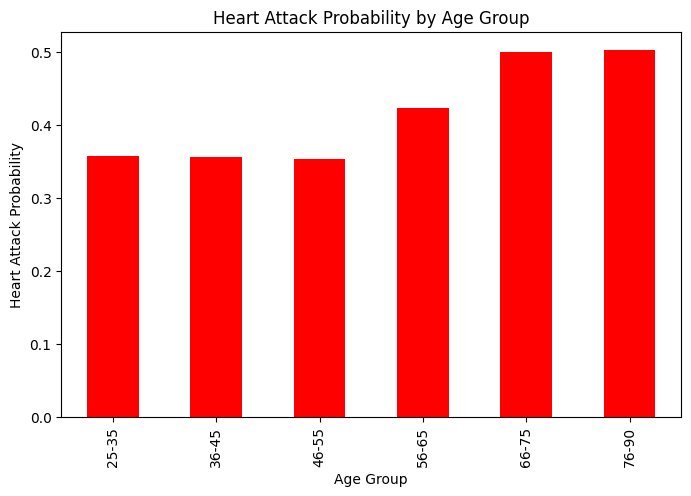

In [ ]:
# Heart attack by age group
df['age_group'] = pd.cut(df['age'], bins=[25, 35, 45, 55, 65, 75, 90], labels=["25-35", "36-45", "46-55", "56-65", "66-75", "76-90"])
age_group_counts = df.groupby('age_group')['heart_attack'].mean()

plt.figure(figsize=(8,5))
age_group_counts.plot(kind='bar', color='red')
plt.title("Heart Attack Probability by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Heart Attack Probability")
plt.show()

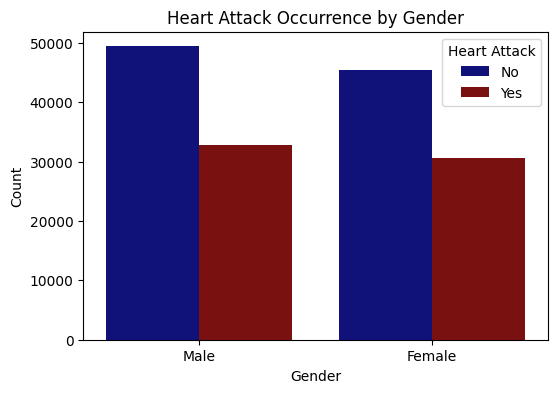

In [ ]:
# Gender-based heart attack occurrence
plt.figure(figsize=(6, 4))
sns.countplot(x="gender", hue="heart_attack", data=df, palette=["darkblue", "darkred"])
plt.title("Heart Attack Occurrence by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Heart Attack", labels=["No", "Yes"])
plt.show()

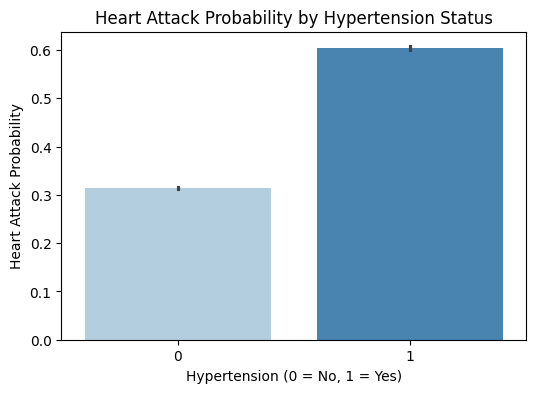

In [ ]:
# Hypertension vs Heart Attack
plt.figure(figsize=(6,4))
sns.barplot(x=df['hypertension'], y=df['heart_attack'], palette='Blues')
plt.title("Heart Attack Probability by Hypertension Status")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Heart Attack Probability")
plt.show()

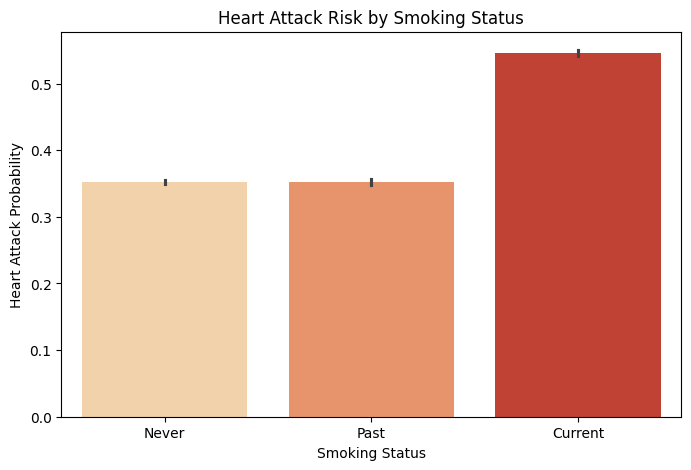

In [ ]:
# Smoking status vs Heart Attack
plt.figure(figsize=(8,5))
sns.barplot(x=df['smoking_status'], y=df['heart_attack'], order=['Never', 'Past', 'Current'], palette='OrRd')
plt.title("Heart Attack Risk by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Heart Attack Probability")
plt.show()

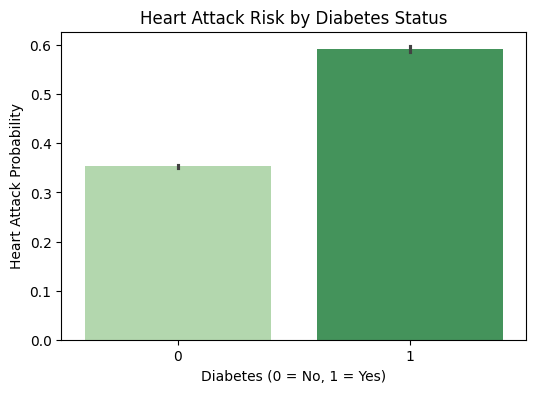

In [ ]:
# Diabetes vs Heart Attack
plt.figure(figsize=(6,4))
sns.barplot(x=df['diabetes'], y=df['heart_attack'], palette='Greens')
plt.title("Heart Attack Risk by Diabetes Status")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Heart Attack Probability")
plt.show()

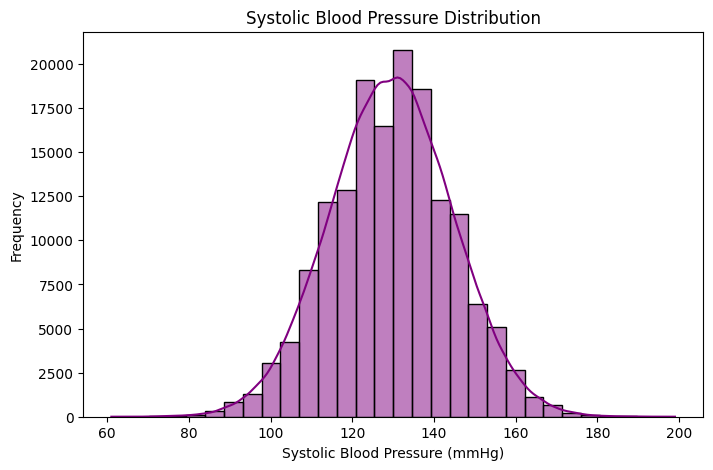

In [ ]:
# Blood Pressure Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['blood_pressure_systolic'], bins=30, kde=True, color='purple')
plt.title("Systolic Blood Pressure Distribution")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Frequency")
plt.show()

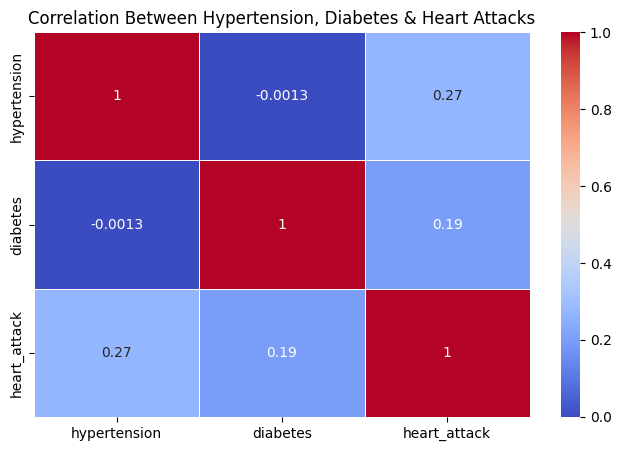

In [ ]:
#Hypertension & Diabetes Effect
plt.figure(figsize=(8, 5))
sns.heatmap(df[["hypertension", "diabetes", "heart_attack"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Hypertension, Diabetes & Heart Attacks")
plt.show()

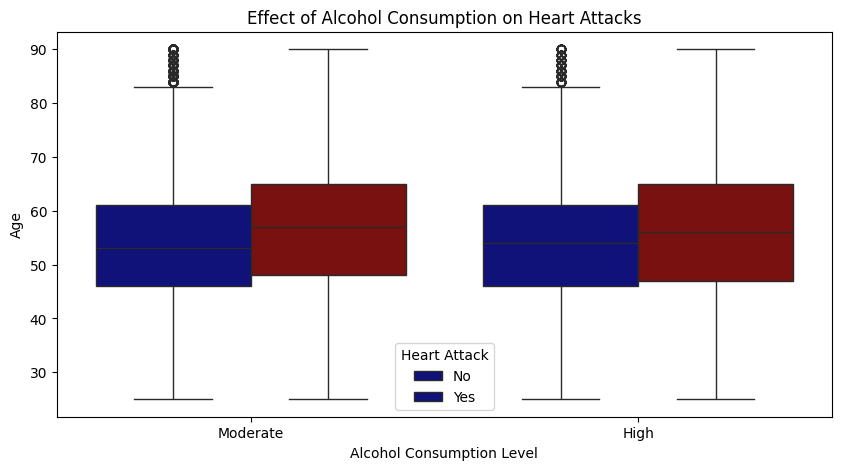

In [ ]:
#Alcohol Consumption Impact
plt.figure(figsize=(10, 5))
sns.boxplot(x="alcohol_consumption", y="age", hue="heart_attack", data=df, palette=["darkblue", "darkred"])
plt.title("Effect of Alcohol Consumption on Heart Attacks")
plt.xlabel("Alcohol Consumption Level")
plt.ylabel("Age")
plt.legend(title="Heart Attack", labels=["No", "Yes"])
plt.show()

Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report # Import classification_report

# Check for any remaining NaNs in X_train and y_train
print("NaNs in X_train before fitting:", X_train.isnull().sum().sum())
print("NaNs in y_train before fitting:", y_train.isnull().sum())

# Although fillna(method='ffill') was used, let's ensure no NaNs remain
# We will drop rows with any remaining NaNs in X_train and y_train
# Note: This might remove data points. Consider other imputation methods if data loss is a concern.
initial_rows = X_train.shape[0]
combined_train_data = X_train.copy()
combined_train_data['heart_attack'] = y_train

# Drop rows with any NaN values in the combined dataframe
combined_train_data.dropna(inplace=True)

# Separate X_train and y_train again
X_train_cleaned = combined_train_data.drop(columns=['heart_attack'])
y_train_cleaned = combined_train_data['heart_attack']

rows_removed = initial_rows - X_train_cleaned.shape[0]
print(f"Number of rows removed due to NaNs: {rows_removed}")
print("Shape of X_train after cleaning:", X_train_cleaned.shape)

gb_model = GradientBoostingClassifier(random_state=42)
# Fit the model using the cleaned data
gb_model.fit(X_train_cleaned, y_train_cleaned)

# Make predictions on the test data

# Check for NaNs in X_test before predicting
print("NaNs in X_test before predicting:", X_test.isnull().sum().sum())

# Drop rows with any NaN values from X_test and corresponding rows from y_test
# Note: This ensures that X_test and y_test still align after dropping
initial_test_rows = X_test.shape[0]
combined_test_data = X_test.copy()
combined_test_data['heart_attack'] = y_test # Temporarily add y_test for synchronized dropping

combined_test_data.dropna(inplace=True)

X_test_cleaned = combined_test_data.drop(columns=['heart_attack'])
y_test_cleaned = combined_test_data['heart_attack']

test_rows_removed = initial_test_rows - X_test_cleaned.shape[0]
print(f"Number of rows removed from test set due to NaNs: {test_rows_removed}")
print("Shape of X_test after cleaning:", X_test_cleaned.shape)


# Use the cleaned test data for prediction
y_pred = gb_model.predict(X_test_cleaned) # Generate predictions

NaNs in X_train before fitting: 0
NaNs in y_train before fitting: 0
Number of rows removed due to NaNs: 0
Shape of X_train after cleaning: (126684, 37)
NaNs in X_test before predicting: 0
Number of rows removed from test set due to NaNs: 0
Shape of X_test after cleaning: (31671, 37)


In [ ]:
print("=== Classification Report ===")
print(classification_report(y_test_cleaned, y_pred)) # Use cleaned y_test for evaluation

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.76      0.81      0.79     18971
           1       0.69      0.62      0.65     12700

    accuracy                           0.73     31671
   macro avg       0.72      0.72      0.72     31671
weighted avg       0.73      0.73      0.73     31671



=== Confusion Matrix ===


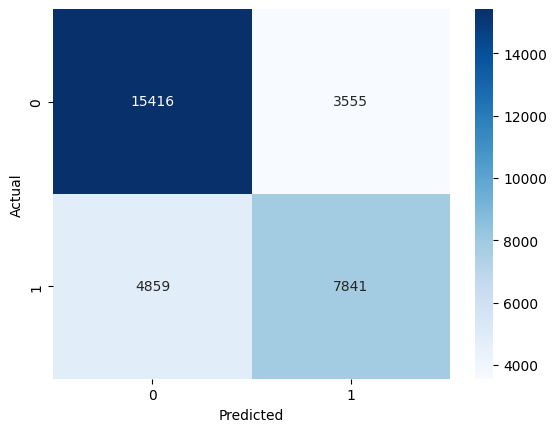

In [ ]:
print("=== Confusion Matrix ===")
# Use the cleaned y_test_cleaned for the confusion matrix
cm = confusion_matrix(y_test_cleaned, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

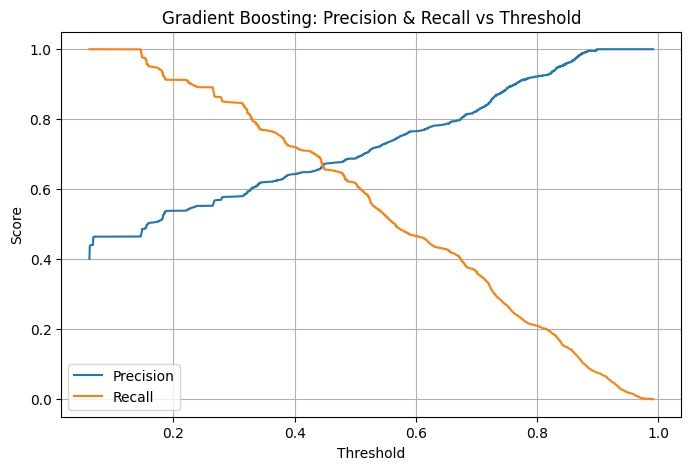

              precision    recall  f1-score   support

           0       0.85      0.59      0.70     18971
           1       0.58      0.85      0.69     12700

    accuracy                           0.69     31671
   macro avg       0.72      0.72      0.69     31671
weighted avg       0.74      0.69      0.69     31671



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
import matplotlib.pyplot as plt

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
# Use the cleaned training data X_train_cleaned and y_train_cleaned
gb_model.fit(X_train_cleaned, y_train_cleaned)

# Predict probabilities for the positive class
# Use the cleaned test data X_test_cleaned for prediction
gb_probs = gb_model.predict_proba(X_test_cleaned)[:, 1]

# Precision-Recall-Threshold
# Use the cleaned test data y_test_cleaned for evaluation
precision, recall, thresholds = precision_recall_curve(y_test_cleaned, gb_probs)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Gradient Boosting: Precision & Recall vs Threshold")
plt.grid(True)
plt.legend()
plt.show()

# Custom threshold for recall boost
custom_threshold = 0.3
y_pred_custom = (gb_probs >= custom_threshold).astype(int)

# Report
# Use the cleaned test data y_test_cleaned for evaluation
print(classification_report(y_test_cleaned, y_pred_custom))

Threshold optimal (F2-score maks): 0.14
F2-score maksimum: 0.8128


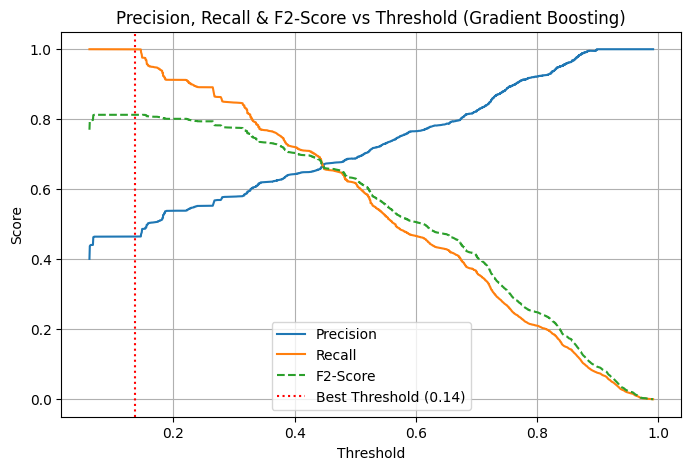


Classification Report (Threshold Optimal):
              precision    recall  f1-score   support

           0       1.00      0.23      0.37     18971
           1       0.46      1.00      0.63     12700

    accuracy                           0.54     31671
   macro avg       0.73      0.61      0.50     31671
weighted avg       0.79      0.54      0.48     31671



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Latih model Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
# Use the cleaned training data X_train_cleaned and y_train_cleaned for fitting
# This ensures the model receives only numerical data and handles potential NaNs
gb_model.fit(X_train_cleaned, y_train_cleaned)

# Prediksi probabilitas kelas positif
# Use the cleaned test data X_test_cleaned for prediction
gb_probs = gb_model.predict_proba(X_test_cleaned)[:, 1]

# Hitung precision, recall, thresholds
# Use the cleaned test data y_test_cleaned for evaluation
precision, recall, thresholds = precision_recall_curve(y_test_cleaned, gb_probs)

# Hitung F2-score (lebih beratkan recall)
beta = 2
f2_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-10)

# Ambil threshold terbaik berdasarkan F2-score maksimum
# Note: thresholds array is one element shorter than precision and recall
best_idx = np.argmax(f2_scores)
# Ensure indexing does not go out of bounds for thresholds
if best_idx >= len(thresholds):
    best_threshold = thresholds[-1] # Use the last threshold if index is out of bounds
else:
    best_threshold = thresholds[best_idx]

best_f2 = f2_scores[best_idx]

print(f"Threshold optimal (F2-score maks): {best_threshold:.2f}")
print(f"F2-score maksimum: {best_f2:.4f}")

# Plot precision, recall, dan F2-score
plt.figure(figsize=(8, 5))
# Plot precision, recall, and F2-score against thresholds
# The thresholds array is one element shorter than precision and recall, so plot up to index -1
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.plot(thresholds, f2_scores[:-1], label="F2-Score", linestyle='--')
plt.axvline(best_threshold, color='red', linestyle=':', label=f'Best Threshold ({best_threshold:.2f})')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall & F2-Score vs Threshold (Gradient Boosting)")
plt.grid(True)
plt.legend()
plt.show()

# Gunakan threshold terbaik
y_pred_best = (gb_probs >= best_threshold).astype(int)

# Tampilkan classification report
# Use the cleaned test data y_test_cleaned for evaluation
print("\nClassification Report (Threshold Optimal):")
print(classification_report(y_test_cleaned, y_pred_best))

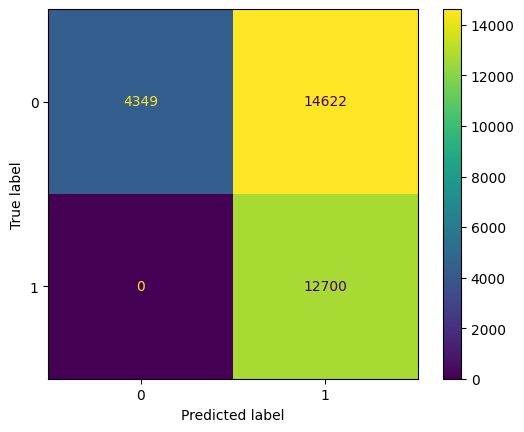

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_best)
ConfusionMatrixDisplay(cm).plot()
